<a href="https://colab.research.google.com/github/Kshitez-Pratap-Singh/Sentiment-Analysis-LSTM/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SENTIMENT ANALYSIS**

### **Description**  

Sentiment Analysis uses natural language processing and machine learning techniques to analyze the emotional tone or sentiment behind a piece of text. It involves identifying and categorizing opinions expressed in a text as positive, negative, or neutral.
This dataset contains different kinds of tweets and their sentiment (0 and 1).
1 stands for a negative tweet
0 stands for a positive tweet

![picture](https://drive.google.com/uc?export=view&id=1Nwwho2ZWXUom9RmgJlpjcTema7YBtODo)

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d dineshpiyasamara/sentiment-analysis-dataset

100% 460k/460k [00:00<00:00, 630kB/s]
100% 460k/460k [00:00<00:00, 629kB/s]


### **Zipping the File**

In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/sentiment-analysis-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

### **Importing the Essential Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,roc_auc_score
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding
from keras.models import load_model

### **Exploring the Dataset**

In [ ]:
df=pd.read_csv('sentiment_analysis.csv')
s,k=df.shape
print('Number of Rows: ',s)
print('Number of Columns: ',k)

Number of Rows:  7920
Number of Columns:  3


In [ ]:
df.head(5)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [ ]:
df.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


### **Visualising the Dataset**

label  label
0      0        5894
1      1        2026
Name: label, dtype: int64


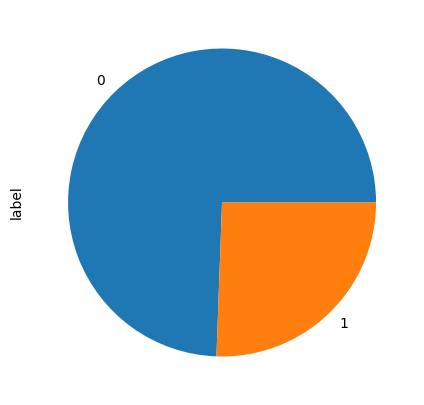

In [ ]:
k=df.groupby('label').label.value_counts()
print(k)
plt.figure(figsize=(5,5))
df.label.value_counts().plot(kind = 'pie')
plt.show()

### **Checking the Null Values**

In [ ]:
# Checking for null value so that Data Impuation can be done
df.isnull().mean()*100

id       0.0
label    0.0
tweet    0.0
dtype: float64

### **Dropping the Unwanted Columns**

In [ ]:
df.drop(['id'],
        axis = 1,
        inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   7920 non-null   int64 
 1   tweet   7920 non-null   object
dtypes: int64(1), object(1)
memory usage: 123.9+ KB


### **Reindexing the Columns**

In [ ]:
df=df.iloc[:,[1,0]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   7920 non-null   object
 1   label   7920 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 123.9+ KB


### **Dependent and Independent Data**

In [ ]:
x=df.iloc[:,0].values
y=df.iloc[:,-1].values

In [ ]:
x

array(['#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone',
       'Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/',
       'We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu',
       ...,
       "Helping my lovely 90 year old neighbor with her iPad this morning has just made me realise that 'I' don't actually need an I pad!",
       'Finally got my #smart #pocket #wifi stay connected anytime,anywhere! #ipad and #samsung #s3 #gadget # http://instagr.am/p/U-53G_vJU8/',
       'Apple Barcelona!!! #Apple #Store #BCN #Barcelona #travel #iphone #selfie #fly #fun #cabincrew… http://instagram.com/p/wBApVzpCl3/'],
      dtype=object)

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

### **Filtering the Dataset**

In [ ]:
x_filtered = []
for tweet in x:
  tweet=tweet.lower()

  for k in tweet:
    punc=''' !()-[]{};:'"\,<>./?@#$%^&*_~ '''
    if k in punc:
      tweet=tweet.replace(k," ")
  x_filtered.append(tweet)

print(x_filtered)

[' fingerprint  pregnancy test https   goo gl h1mfqv  android  apps  beautiful  cute  health  igers  iphoneonly  iphonesia  iphone', 'finally a transparant silicon case    thanks to my uncle     yay  sony  xperia  s  sonyexperias… http   instagram com p yget5jc6jm ', 'we love this  would you go   talk  makememories  unplug  relax  iphone  smartphone  wifi  connect    http   fb me 6n3lsupcu', 'i m wired i know i m george i was made that way     iphone  cute  daventry  home http   instagr am p li 5 ujs4k ', 'what amazing service  apple won t even talk to me about a question i have unless i pay them  19 95 for their stupid support ', 'iphone software update fucked up my phone big time stupid iphones', 'happy for us     instapic  instadaily  us  sony  xperia  xperiaz https   instagram com p z9qgfwlvj7 ', 'new type c charger cable  uk http   www ebay co uk itm   112598674021 …  bay  amazon  etsy new year  rob cross  toby young  evemun  mcmafia  taylor  spectre 2018  newyear  starting 2018  

### **Sentence to Vector**

In [ ]:
# converting sentence to vector

vocabulary_size=5000
one_hot_encoded=[one_hot(tweet,vocabulary_size) for tweet in x_filtered]
print(one_hot_encoded)

[[1092, 2709, 2189, 4279, 3918, 667, 1796, 4104, 1369, 4612, 62, 1176, 2501, 2999, 1876, 38], [1796, 4147, 4045, 2853, 2886, 2136, 473, 337, 4566, 1529, 1984, 3417, 1453, 374, 1887, 531, 1516, 2677, 1953], [629, 113, 36, 4627, 2792, 3735, 1845, 2994, 135, 3628, 38, 4238, 4742, 1625, 1887, 2727, 4020, 1983], [36, 2771, 2552, 36, 4432, 36, 2771, 3517, 36, 85, 2732, 2736, 659, 38, 62, 2302, 2173, 1887, 842, 1082, 2677, 3276, 4290, 4227], [3966, 873, 3256, 757, 4092, 3524, 1608, 1845, 473, 4020, 159, 4147, 1926, 36, 3563, 731, 36, 4776, 3652, 2881, 3236, 3129, 4321, 4007, 2311], [38, 3908, 4038, 3745, 3978, 337, 249, 716, 3273, 4007, 3596], [1761, 3129, 944, 844, 383, 944, 1984, 3417, 3228, 4279, 531, 1516, 2677, 818], [1860, 513, 3707, 710, 4039, 2298, 1887, 4847, 2410, 842, 2298, 10, 151, 3324, 749, 3666, 3052, 1860, 4669, 2288, 411, 1768, 1780, 3608, 4545, 3000, 42, 2639, 2990, 1171, 2639, 405, 556, 4413, 3271, 1314, 428, 1516, 2706], [2764, 473, 3735, 3430, 275, 730, 473, 2634, 38, 469

In [ ]:
max_length=500
x_padded=pad_sequences(one_hot_encoded,max_length,padding='post')

### **Splitting the Dataset**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_padded,y,test_size=0.3)

### **Deep Learning**

In [ ]:
embedded_vector_size=35
model=Sequential()
model.add(Embedding(vocabulary_size,embedded_vector_size,input_length=max_length))
model.add(LSTM(100))
model.add(Dense(1,activation="sigmoid"))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 35)           175000    
                                                                 
 lstm (LSTM)                 (None, 100)               54400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 229501 (896.49 KB)
Trainable params: 229501 (896.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
174/174 [==============================] - 27s 91ms/step - loss: 0.5834 - accuracy: 0.7368
Epoch 2/50
174/174 [==============================] - 6s 36ms/step - loss: 0.5770 - accuracy: 0.7390
Epoch 3/50
174/174 [==============================] - 5s 30ms/step - loss: 0.5773 - accuracy: 0.7390
Epoch 4/50
174/174 [==============================] - 4s 24ms/step - loss: 0.5753 - accuracy: 0.7390
Epoch 5/50
174/174 [==============================] - 5s 26ms/step - loss: 0.5760 - accuracy: 0.7390
Epoch 6/50
174/174 [==============================] - 5s 26ms/step - loss: 0.5751 - accuracy: 0.7390
Epoch 7/50
174/174 [==============================] - 4s 21ms/step - loss: 0.5751 - accuracy: 0.7390
Epoch 8/50
174/174 [==============================] - 5s 26ms/step - loss: 0.5755 - accuracy: 0.7390
Epoch 9/50
174/174 [==============================] - 4s 22ms/step - loss: 0.5748 - accuracy: 0.7390
Epoch 10/50
174/174 [==============================] - 3s 19ms/step - loss: 0.5754 - accur

### **Accuracy**

In [ ]:
score=model.evaluate(x_test,y_test)
print('Accuracy: ',score)

75/75 [==============================] - 1s 10ms/step - loss: 0.5553 - accuracy: 0.7563
Accuracy:  [0.5553251504898071, 0.756313145160675]


### **Model Saving**

In [ ]:
model.save('tweet_analysis')

In [ ]:
trained_model=load_model(r"/content/tweet_analysis")

In [ ]:
def get_sentence(sentence):
  sentence=sentence.lower()
  punc=''' !()-[]{};:'"\,<>./?@#$%^&*_~ '''
  for word in sentence:
    if word in punc:
      sentence=sentence.replace(word," ")

  from keras.models import load_model
  trained_model=load_model(r"/content/tweet_analysis")
  predicted=trained_model.predict(x_test)[2]
  sentiment=1 if predicted < 0.6 else 0

  if sentiment==0:
    print('Positive')
  else:
    print('Negative')
  return sentiment

In [ ]:
get_sentence('@BrbrryLove13 Shesh up, you. Told ya to stop killing my mojo! ;p <33333')

75/75 [==============================] - 1s 9ms/step
Negative


1

### **Implementing as Web App**

In [ ]:
!pip install anvil-uplink

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45228 sha256=4bce70b22db447e83c57ef66de5621ca6eb62b636ed2187d83b4dfb1b38092d1
  Stored in directory: /root/.cache/pip/wheels/2e/7c/ad/d9c746276bf024d44296340869fcb169f1e5d80fb147351a57
Successfully built ws4py


In [ ]:
import anvil.server

In [ ]:
anvil.server.connect('server_WCK7GQRTGJRP7GIO6P4XSPSL-X6MCLNOVX6HDWS7R')

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default Environment" as SERVER


In [ ]:
@anvil.server.callable
def get_sentence(sentence):
  sentence=sentence.lower()
  punc=''' !()-[]{};:'"\,<>./?@#$%^&*_~ '''
  for word in sentence:
    if word in punc:
      sentence=sentence.replace(word," ")

  from keras.models import load_model
  trained_model=load_model(r"/content/tweet_analysis")
  predicted=trained_model.predict(x_test)[2]
  sentiment=1 if predicted < 0.6 else 0

  if sentiment==0:
    return 'Positive'
  else:
    return 'Negative'
  #return sentiment

In [ ]:
anvil.server.wait_forever()

75/75 [==============================] - 1s 9ms/step


### **Web App Link**

visit link=https://immense-fine-chicken.anvil.app